In [3]:
#import required library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/HP/Downloads/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = 'latin-1')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [4]:
print("%.2f" %df["Y2017"].mean())
print("%.2f" %df["Y2017"].std())

140.92
1671.86


In [5]:
df.groupby("Element")["Y2017"].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

In [6]:
print(df["Y2014"].isnull().sum())
print("%.3f" %(df["Y2014"].isnull().sum()/df.shape[0]*100))

1589
2.607


In [16]:
df[df["Area"]=="Madagascar"]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
30715,129,Madagascar,2501,Population,511,Total Population - Both sexes,1000 persons,23590.00,24234.00,24894.00,25571.00,26262.00
30716,129,Madagascar,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
30717,129,Madagascar,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1986.00,1922.00,1918.00,1943.00,1938.00
30718,129,Madagascar,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,44.45,43.26,43.35,43.94,44.17
30719,129,Madagascar,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,22.18,22.97,23.83,25.26,24.12
...,...,...,...,...,...,...,...,...,...,...,...,...
32149,129,Madagascar,2899,Miscellaneous,5142,Food,1000 tonnes,10.00,11.00,11.00,11.00,12.00
32150,129,Madagascar,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,0.44,0.44,0.44,0.44,0.44
32151,129,Madagascar,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,0.00,0.00,0.00,0.00,0.00
32152,129,Madagascar,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.01,0.01,0.01,0.01,0.01


In [7]:
df[df["Area"]=="Madagascar"]
df1 = df.loc[30715:32153,["Area", "Element", "Y2015"]]
df1[df1["Element"]=="Protein supply quantity (g/capita/day)"].sum()

Area       MadagascarMadagascarMadagascarMadagascarMadaga...
Element    Protein supply quantity (g/capita/day)Protein ...
Y2015                                                 173.05
dtype: object

In [8]:
df["Area"].nunique()

49

In [10]:
df.groupby("Area")["Y2017"].sum().max()

1483268.23

In [11]:
df.groupby("Element")[["Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]].sum()

,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10225.56,10235.74,10102.77,10253.84,10258.69
Feed,216927.89,225050.22,228958.65,223705.68,233489.68
Food,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,153223.00,155439.00,157787.00,160614.00,163902.00


In [12]:
df.groupby("Item")[["Y2015", "Y2018"]].sum()

,Y2015,Y2018
Item,,
"Alcohol, Non-Food",2180.00,2293.00
Alcoholic Beverages,98783.72,97847.27
Animal Products,11811.73,11578.61
Animal fats,200675.72,269648.27
Apples and products,10559.15,9640.51
...,...,...
"Vegetables, Other",158104.08,163987.21
Vegetal Products,107064.17,107775.39
Wheat and products,234710.51,242645.19


In [13]:
df3_corr = df.loc[:, ["Element Code","Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]].corr()
df3_corr

,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element Code,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


<Axes: >

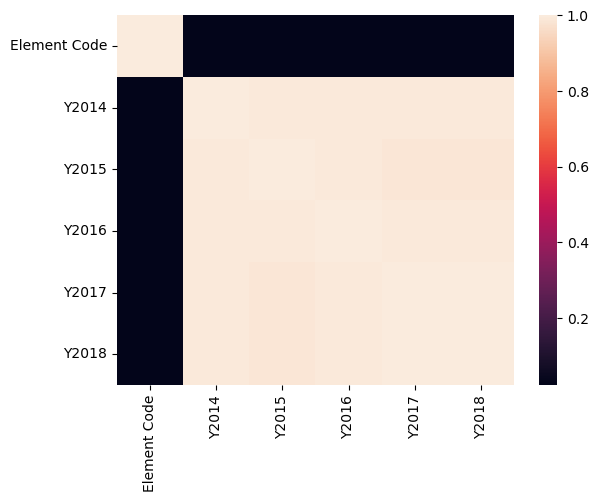

In [14]:
sns.heatmap(df3_corr)

In [15]:
df.groupby("Area")["Y2017"].sum().sort_values(ascending = False)

Area
Nigeria                        1483268.23
Egypt                           866379.92
South Africa                    517590.54
Ethiopia                        448683.76
Morocco                         388495.36
Ghana                           337599.06
Algeria                         325644.27
United Republic of Tanzania     322616.85
Kenya                           264660.66
Sudan                           239931.92
Cameroon                        232030.43
Angola                          229159.57
Côte d'Ivoire                   224599.01
Uganda                          213950.38
Malawi                          181098.71
Mozambique                      161407.98
Mauritania                      156665.46
Mali                            149928.33
Madagascar                      131197.73
Niger                           126707.58
Benin                           124771.22
Tunisia                         124167.20
Zambia                          103223.77
Burkina Faso                 